In [378]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as BOLTZMANN
from scipy import stats
import pandas as pd
import time

In [379]:
class Simulation:
    def __init__(self, dt=None, L=None, mass=np.array([1.6735575E-27]), mass_boundry= np.array([1.6735575E-24]),\
                 force=None, Nsteps=None, step=0, printfreq=1000, seed=937142, xyz_filename='sim.xyz', velocities_filename='velocities.xyz',\
                 forces_filename='forces.xyz',temp_right=298, temp_left=298, R_left=None, R_right=None, R_boundry=None, kind=['H']):
        self.dt = dt
        self.L = L
        self.mass = mass
        self.mass_boundry = mass_boundry
        self.Nsteps = Nsteps
        self.Nparticles_left = R_left.shape[0]
        self.Nparticles_right = R_right.shape[0]
        self.step = step
        self.printfreq = printfreq
        self.xyz_file = open(xyz_filename, 'w')
        self.velocities_file = open(velocities_filename, 'w')
        self.forces_file = open(forces_filename, 'w')
        self.temp_right = temp_right
        self.temp_left = temp_left
        self.R_left = R_left
        self.R_right = R_right
        self.R_boundry = R_boundry
        self.Nparticles = self.Nparticles_left + self.Nparticles_right
        self.beta_left = 1/(BOLTZMANN*self.temp_left)
        self.beta_right = 1/(BOLTZMANN*self.temp_right)
        self.mass_matrix = np.array( [self.mass,]*3 ).transpose()
        self.mass_matrix_boundry = np.array( [self.mass_boundry,]*3 ).transpose()
        self.seed = seed
        self.kind = kind
        self.p_left = np.zeros((self.Nparticles_left, 3))  
        self.p_right = np.zeros((self.Nparticles_right, 3))
        self.p_boundry = np.zeros(3)
        self.F_left = np.zeros((self.Nparticles_left, 3))
        self.F_right = np.zeros((self.Nparticles_right, 3))
        self.F_boundry = np.zeros((1, 3))
        self.U_left = 0
        self.U_right = 0
        self.U_boundry = 0
        np.random.seed( self.seed )

        #check force type
        if (force == "LJ"):
            self.force_type = "eval" + force
        else:
            raise ValueError("Wrong ftype value - use LJ.")
    
    def __del__( self ):
        self.xyz_file.close()
        self.velocities_file.close()
        self.forces_file.close()
    
    def evalForce( self, **kwargs ):
    
        getattr(self, self.force_type)(**kwargs)
             

    def dumpVelocities( self ):
        self.velocities_file.write( str( self.Nparticles ) + "\n")
        self.velocities_file.write( "Step " + str( self.step ) + "\n" )
        
        for i in range( self.Nparticles_left ):
            self.velocities_file.write( self.kind[0] + " Left: " + \
                              "{:.6e}".format( self.p_left[i,0]) + " " + \
                              "{:.6e}".format( self.p_left[i,1]) + " " + \
                              "{:.6e}".format( self.p_left[i,2]) + "\n" )
        
        for i in range( self.Nparticles_right ):
            self.velocities_file.write( self.kind[0] + " Right: " + \
                              "{:.6e}".format( self.p_right[i,0]) + " " + \
                              "{:.6e}".format( self.p_right[i,1]) + " " + \
                              "{:.6e}".format( self.p_right[i,2]) + "\n" )
        self.velocities_file.write( "Boundry: " + \
                              "{:.6e}".format( self.p_boundry[0]) + " " + \
                              "{:.6e}".format( self.p_boundry[1]) + " " + \
                              "{:.6e}".format( self.p_boundry[2]) + "\n" )
        time.sleep(0.1)

    def dumpXYZ( self ):
        self.xyz_file.write( str( self.Nparticles ) + "\n")
        self.xyz_file.write( "Step " + str( self.step ) + "\n" )
        
        for i in range( self.Nparticles_left ):
            self.xyz_file.write( self.kind[0] + " Left: " + \
                              "{:.6e}".format( self.R_left[i,0]) + " " + \
                              "{:.6e}".format( self.R_left[i,1]) + " " + \
                              "{:.6e}".format( self.R_left[i,2]) + "\n" )
        
        for i in range( self.Nparticles_right ):
            self.xyz_file.write( self.kind[0] + " Right: " + \
                              "{:.6e}".format( self.R_right[i,0]) + " " + \
                              "{:.6e}".format( self.R_right[i,1]) + " " + \
                              "{:.6e}".format( self.R_right[i,2]) + "\n" )
        self.xyz_file.write( "Boundry: " + \
                              "{:.6e}".format( self.R_boundry[0]) + " " + \
                              "{:.6e}".format( self.R_boundry[1]) + " " + \
                              "{:.6e}".format( self.R_boundry[2]) + "\n" )
        time.sleep(0.1)
    
    def dumpForces( self ):
        self.forces_file.write( str( self.Nparticles ) + "\n")
        self.forces_file.write( "Step " + str( self.step ) + "\n" )

        for i in range( self.Nparticles_left ):
            self.forces_file.write( self.kind[0] + " Left: " + \
                                "{:.6e}".format( self.F_left[i,0]) + " " + \
                                "{:.6e}".format( self.F_left[i,1]) + " " + \
                                "{:.6e}".format( self.F_left[i,2]) + "\n" )
            
        for i in range( self.Nparticles_right ):
            self.forces_file.write( self.kind[0] + " Right: " + \
                                "{:.6e}".format( self.F_right[i,0]) + " " + \
                                "{:.6e}".format( self.F_right[i,1]) + " " + \
                                "{:.6e}".format( self.F_right[i,2]) + "\n" )
        self.forces_file.write( "Boundry: " + \
                                "{:.6e}".format( self.F_boundry[0]) + " " + \
                                "{:.6e}".format( self.F_boundry[1]) + " " + \
                                "{:.6e}".format( self.F_boundry[2]) + "\n" )
        time.sleep(0.1)
        

    def sampleMB( self, removeCM=True ):
        gaussian_rv = stats.norm
        variance_left = self.mass[0]/self.beta_left
        variance_right = self.mass[0]/self.beta_right
        samples_left = gaussian_rv.rvs(loc=0, scale=np.sqrt(variance_left), size=(self.Nparticles_left, 3))
        samples_right = gaussian_rv.rvs(loc=0, scale=np.sqrt(variance_right), size=(self.Nparticles_right, 3))
        if removeCM:
            samples_left -= np.mean(samples_left,axis=0)
            samples_right -= np.mean(samples_right,axis=0)
        self.p_left = samples_left
        self.p_right = samples_right

    def apply_reflective_boundry(self):
        max_dim_left = np.array([self.R_boundry[0], self.L/2, self.L/2])
        min_dim_left = np.array([-self.L/2, -self.L/2, -self.L/2])
        max_dim_right = np.array([self.L/2, self.L/2, self.L/2])
        min_dim_right = np.array([self.R_boundry[0], -self.L/2, -self.L/2])

        for dim in range(3):
            # Left side
            over_max = self.R_left[:, dim] > max_dim_left[dim]
            under_min = self.R_left[:, dim] < min_dim_left[dim]

            self.R_left[:, dim] = np.where(over_max, 2 * max_dim_left[dim] - self.R_left[:, dim], self.R_left[:, dim])
            self.R_left[:, dim] = np.where(under_min, 2 * min_dim_left[dim] - self.R_left[:, dim], self.R_left[:, dim])
            self.p_left[:, dim][over_max | under_min] *= -1

            # Right side
            over_max = self.R_right[:, dim] > max_dim_right[dim]
            under_min = self.R_right[:, dim] < min_dim_right[dim]

            self.R_right[:, dim] = np.where(over_max, 2 * max_dim_right[dim] - self.R_right[:, dim], self.R_right[:, dim])
            self.R_right[:, dim] = np.where(under_min, 2 * min_dim_right[dim] - self.R_right[:, dim], self.R_right[:, dim])
            self.p_right[:, dim][over_max | under_min] *= -1

            self.R_left[:, dim] = np.clip(self.R_left[:, dim], min_dim_left[dim], max_dim_left[dim])
            self.R_right[:, dim] = np.clip(self.R_right[:, dim], min_dim_right[dim], max_dim_right[dim])


    def evalLJ(self, eps, sig):
        r_cutoff = self.L / 2

        self.U_left = 0
        self.F_left = np.zeros_like(self.R_left)
        self.F_boundry = np.zeros_like(self.R_boundry)
        
        # Pairwise interactions for particles within the left region
        delta = self.R_left[:, np.newaxis, :] - self.R_left[np.newaxis, :, :]
        distances = np.linalg.norm(delta, axis=2)
        mask = (distances < r_cutoff) & (distances > 1E-14)
        inv_dist6 = np.where(mask, (sig / distances)**6, 0.0)
        inv_dist12 = inv_dist6**2

        self.U_left = 4 * eps * np.sum(inv_dist12 - inv_dist6) / 2  # Avoid double counting
        force_magnitude = np.where(mask, 24 * eps * (2 * inv_dist12 - inv_dist6) / distances**2, 0.0)
        forces = np.sum(force_magnitude[..., np.newaxis] * delta, axis=1)
        self.F_left += forces

        # Repeat similar logic for the right side
        self.U_right = 0
        self.F_right = np.zeros_like(self.R_right)
        delta = self.R_right[:, np.newaxis, :] - self.R_right[np.newaxis, :, :]
        distances = np.linalg.norm(delta, axis=2)
        mask = (distances < r_cutoff) & (distances > 1E-14)
        inv_dist6 = np.where(mask, (sig / distances)**6, 0.0)
        inv_dist12 = inv_dist6**2

        self.U_right = 4 * eps * np.sum(inv_dist12 - inv_dist6) / 2
        force_magnitude = np.where(mask, 24 * eps * (2 * inv_dist12 - inv_dist6) / distances**2, 0.0)
        forces = np.sum(force_magnitude[..., np.newaxis] * delta, axis=1)
        self.F_right += forces

    
    def VVstep(self, **kwargs):
        p_t_half_right = self.p_right + 0.5 * self.F_right * self.dt
        p_t_half_left = self.p_left + 0.5 * self.F_left * self.dt
        p_t_half_boundry = self.p_boundry + 0.5 * self.F_boundry * self.dt
        self.R_left += p_t_half_left * self.dt / self.mass_matrix
        self.R_right += p_t_half_right * self.dt / self.mass_matrix
        self.R_boundry += p_t_half_boundry * self.dt / self.mass_boundry[0]
        self.apply_reflective_boundry()
        self.evalForce(**kwargs)
        self.p_left = p_t_half_left + 0.5 * self.F_left * self.dt
        self.p_right = p_t_half_right + 0.5 * self.F_right * self.dt  
        self.p_boundry = p_t_half_boundry + 0.5 * self.F_boundry * self.dt

    def run( self, **kwargs ):
        self.dumpXYZ()
        self.dumpVelocities()
        self.sampleMB()
        self.apply_reflective_boundry()
        self.evalForce(**kwargs)
        for i in range( self.Nsteps ):
            self.VVstep(**kwargs)
            self.step += 1
            if self.step % self.printfreq == 0:
                self.dumpXYZ()
                self.dumpVelocities()
                self.dumpForces()
                print('Step:', self.step)

In [380]:
L = 100E-9 #Box size [-10,10] nm
Nparticles_left = 50
Nparticles_right = 50
boundry = np.array([-10E-9, 0, 0])
R_left = np.random.uniform([-L/2,-L/2,-L/2],[boundry[0], L/2, L/2], (Nparticles_left, 3))
R_right = np.random.uniform([boundry[0],-L/2,-L/2],[L/2, L/2, L/2], (Nparticles_right, 3))
R_boundry = boundry
mass = np.array([1.6735575E-27])*39.948 #mass of argon
mass_boundry = np.array([1.6735575E-27])*39.948 # 10 time more heavy than atom
dt = 2E-15
Nsteps = 10000
printfreq = 1000
xyz_filename = 'sim.xyz'
velocities_filename = 'velocities.xyz'
temp_left = 298
temp_right = 298
eps = 1.65E-21
sig = 0.34E-9
LJ_dict = {'eps': eps, 'sig': sig}
sim = Simulation(dt=dt, L=L, mass=mass, mass_boundry=mass_boundry, force="LJ", Nsteps=Nsteps,\
                 printfreq=printfreq, R_left=R_left, R_right=R_right, R_boundry=R_boundry,\
                 temp_left=temp_left, temp_right=temp_right, xyz_filename=xyz_filename, velocities_filename=velocities_filename, kind=['Ar'])
sim.run(**LJ_dict)

/tmp/ipykernel_37342/3101171807.py:170: RuntimeWarning: divide by zero encountered in divide
  inv_dist6 = np.where(mask, (sig / distances)**6, 0.0)
/tmp/ipykernel_37342/3101171807.py:174: RuntimeWarning: invalid value encountered in divide
  force_magnitude = np.where(mask, 24 * eps * (2 * inv_dist12 - inv_dist6) / distances**2, 0.0)
/tmp/ipykernel_37342/3101171807.py:184: RuntimeWarning: divide by zero encountered in divide
  inv_dist6 = np.where(mask, (sig / distances)**6, 0.0)
/tmp/ipykernel_37342/3101171807.py:188: RuntimeWarning: invalid value encountered in divide
  force_magnitude = np.where(mask, 24 * eps * (2 * inv_dist12 - inv_dist6) / distances**2, 0.0)


Step: 1000
Step: 2000
Step: 3000
Step: 4000
Step: 5000
Step: 6000
Step: 7000
Step: 8000
Step: 9000
Step: 10000


In [381]:
def read_xyz_many_particles(file_name):
    with open(file_name, 'r') as f:
        data = f.read().split('\n')
    data = np.array(data)
    return data

def parse_particle_data(data):
    steps = []
    left_particles = []
    right_particles = []
    boundary_positions = []

    current_left = []
    current_right = []
    current_boundary = []

    for row in data:
        if 'Step' in row:
            if current_left:
                left_particles.append(np.array(current_left))
                current_left = []
            if current_right:
                right_particles.append(np.array(current_right))
                current_right = []
            if current_boundary:
                boundary_positions.append(np.array(current_boundary))
                current_boundary = []
            steps.append(int(row.split()[1]))
        elif 'Left' in row:
            current_left.append([float(x) for x in row.split()[2:]])
        elif 'Right' in row:
            current_right.append([float(x) for x in row.split()[2:]])
        elif 'Boundry' in row:
            current_boundary.append([float(x) for x in row.split()[1:]])

    # Append the last step's data
    if current_left:
        left_particles.append(np.array(current_left))
    if current_right:
        right_particles.append(np.array(current_right))
    if current_boundary:
        boundary_positions.append(np.array(current_boundary))

    return left_particles, right_particles, boundary_positions


data = read_xyz_many_particles('sim.xyz')
steps_data = [row for row in data if 'Left' in row or 'Right' in row or 'Boundry' in row or 'Step' in row]
left_particles, right_particles, boundary_positions = parse_particle_data(steps_data)

left_particles = np.array(left_particles)
right_particles = np.array(right_particles)
boundary_positions = np.array(boundary_positions)

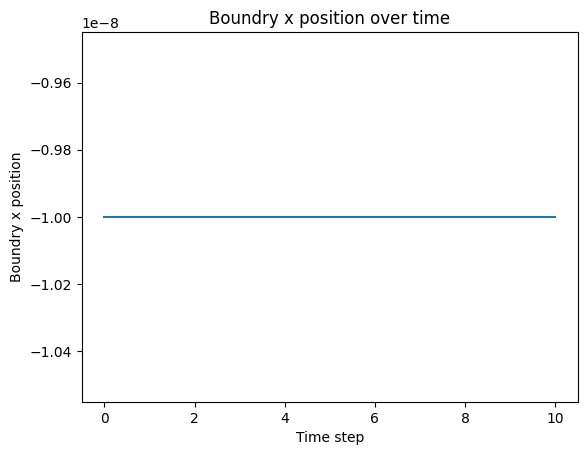

In [382]:
### plot boundry x coordinate over time ###
plt.plot(boundary_positions[:,:,0])
plt.xlabel('Time step')
plt.ylabel('Boundry x position')
plt.title('Boundry x position over time')
plt.show()


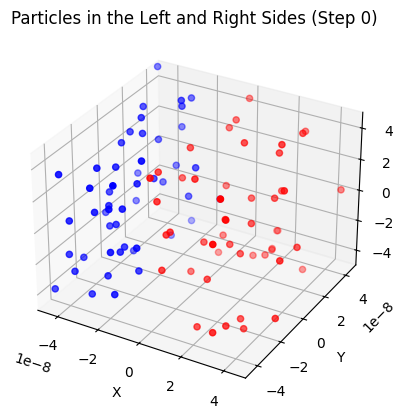

In [383]:
### animate the particles in the left side ###
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML



# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-L / 2, L / 2)
ax.set_ylim(-L / 2, L / 2)
ax.set_zlim(-L / 2, L / 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Particles in the Left and Right Sides')

# Initialize scatter plots
lparticles = left_particles[0]
rparticles = right_particles[0]
sc = ax.scatter(lparticles[:, 0], lparticles[:, 1], lparticles[:, 2], c='b', label='Left Particles')
sc2 = ax.scatter(rparticles[:, 0], rparticles[:, 1], rparticles[:, 2], c='r', label='Right Particles')

# Update function for animation
def update(frame):
    lparticles = left_particles[frame]
    rparticles = right_particles[frame]
    sc._offsets3d = (lparticles[:, 0], lparticles[:, 1], lparticles[:, 2])
    sc2._offsets3d = (rparticles[:, 0], rparticles[:, 1], rparticles[:, 2])
    ax.set_title(f'Particles in the Left and Right Sides (Step {frame})')
    return sc, sc2

# Animation
ani = animation.FuncAnimation(fig, update, frames=int(Nsteps / printfreq), interval=100, blit=False)

# Display the animation in the notebook
HTML(ani.to_jshtml())

In [384]:
ani.save('particles_animation.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.
